In [1]:
import pandas as pd 
import numpy as np


In [2]:
path = "/Users/angeline/Downloads/GRA/Prototype Codes/Dataset/"

student_df = pd.read_csv(path + "final_fake_school_data.csv")
mmu_df = pd.read_csv(path + "mmu_fake_data.csv")

In [3]:
student_df.head()

,School_ID,School_Name,School_Location,School_Ranking,Historical_Enrollment,Average_SPM_As,Avg_Parent_Income_Score,Most_Common_Parent_Education,Most_Common_Parent_Occupation,Science_Stream_Percentage,...,Avg_Student_SPM_English_Score,Avg_Student_SPM_Math_Score,Avg_Student_SPM_Science_Score,Avg_Student_CoCurricular_Score,Social_Media_Interactions,Sentiment_Score,Recruitment_Event_Success_Rate,Institutional_Engagement_Score,Avg_Student_University_Interest_Score,Preferred_Field_of_Study
0,SCH1000,SMK Putra Indah,Penang,52,1060,10,3,Secondary,Employed,31.4,...,80.5,95.7,30.1,99.2,160,-0.196,66.7,0.432,29.1,Media Arts
1,SCH1001,SMK Indah Seri,Sarawak,42,1699,7,1,Secondary,Self-Employed,35.1,...,72.5,41.9,34.6,94.9,315,0.063,57.0,0.016,23.1,Computer
2,SCH1002,SMK Melawati Taman,Selangor,60,1678,7,3,Primary,Unemployed,34.1,...,42.9,97.9,84.3,93.9,445,0.427,80.9,0.327,57.0,Animation & Visual Effects
3,SCH1003,SMK Sri Putra,Selangor,62,495,8,2,Secondary,Self-Employed,23.9,...,50.7,41.6,31.1,42.3,128,-0.301,30.4,0.815,70.7,Bachelor of Accounting (Hons)
4,SCH1004,SMK Maju Aman,Kelantan,35,488,6,1,Secondary,Employed,31.7,...,71.4,49.2,69.3,38.3,430,0.213,83.3,0.561,77.1,Bachelor of Business Management (Hons)


In [4]:
student_df.columns

Index(['School_ID', 'School_Name', 'School_Location', 'School_Ranking',
       'Historical_Enrollment', 'Average_SPM_As', 'Avg_Parent_Income_Score',
       'Most_Common_Parent_Education', 'Most_Common_Parent_Occupation',
       'Science_Stream_Percentage', 'Arts_Stream_Percentage',
       'Malay_Percentage', 'Chinese_Percentage', 'Indian_Percentage',
       'Others_Percentage', 'Own_House_Percentage', 'Rent_House_Percentage',
       'Govt_Quarters_Percentage', 'Avg_Student_SPM_English_Score',
       'Avg_Student_SPM_Math_Score', 'Avg_Student_SPM_Science_Score',
       'Avg_Student_CoCurricular_Score', 'Social_Media_Interactions',
       'Sentiment_Score', 'Recruitment_Event_Success_Rate',
       'Institutional_Engagement_Score',
       'Avg_Student_University_Interest_Score', 'Preferred_Field_of_Study'],
      dtype='object')

In [5]:
mmu_df.head()

,Total_Staff,Total_Budget,Average_Staff_Cost_per_Visit,Preferred_Socioeconomic_Status,Preferred_Academic_Performance,Preferred_Student_Stream,Preferred_Field_Cluster,Scholarship_Strategy,Target_Scholarship_Students,Campaign_Start_Date,...,Preferred_Region,Min_Real_Time_Response_Rate,Min_Social_Media_Interactions,Preferred_Sentiment,Max_Cost_Per_Student,Minimum_Institutional_Engagement_Score,Preferred_Property_Type,Priority_Ethnicity_Group,Focus_on_Returning_Schools,Budget_Utilization_Strategy
0,100,100000,500,High,5,Science,IT,Yes,Yes,2025-05-01,...,Central,50.0,100,Positive,2000,0.5,Landed,All,Yes,Moderate


# Feature Selection
Before going into the Ranking of School Visits, it is important to determine the important features that affect the school ranking


Top 10 Important Features based on Random Forest:
                           Feature  Importance
18   Avg_Student_SPM_Science_Score    0.080215
23  Institutional_Engagement_Score    0.057277
19  Avg_Student_CoCurricular_Score    0.056026
22  Recruitment_Event_Success_Rate    0.055105
2            Historical_Enrollment    0.054689
0                      School_Name    0.054083
20       Social_Media_Interactions    0.053813
17      Avg_Student_SPM_Math_Score    0.052257
24        Preferred_Field_of_Study    0.051267
16   Avg_Student_SPM_English_Score    0.049949


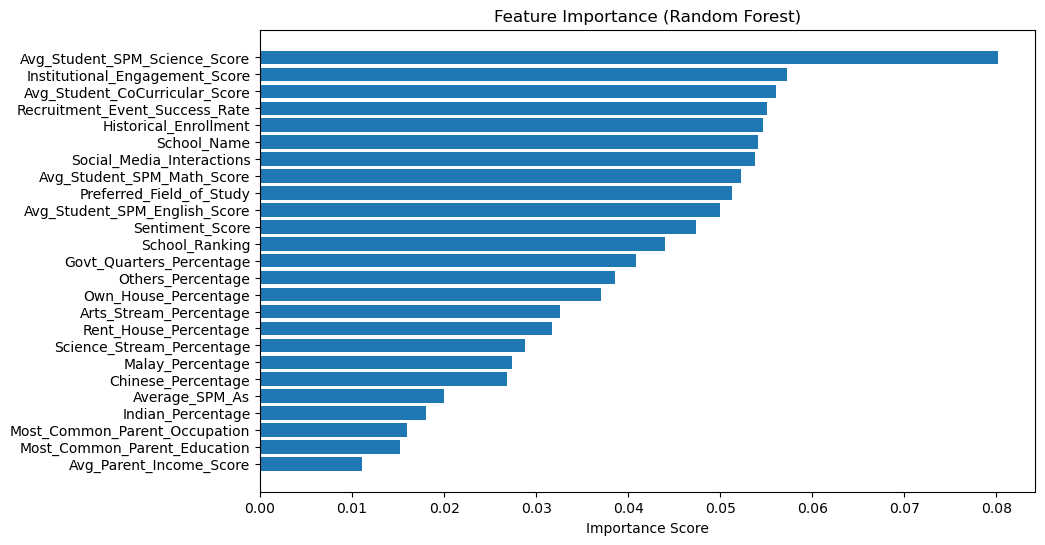

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


target = 'Avg_Student_University_Interest_Score'
features = student_df.drop(columns=['School_ID', 'School_Location', target])  # Drop ID, Location, Field of Study, Target

categorical_cols = features.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    features[col] = le.fit_transform(features[col])

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, student_df[target])

# Extract feature importances
importances = rf.feature_importances_
feature_names = features.columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Step 7: Display Important Features
top_features = feature_importances.head(10)
print("\nTop 10 Important Features based on Random Forest:")
print(top_features)

# Step 8: Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


# Hybrid Decision Models
1. normalize the features
2. assign weightage to each feature using Random Forest (higher rank, higher weightage)

In [7]:
from sklearn.preprocessing import MinMaxScaler

top_features['Normalized_Importance'] = top_features['Importance'] / top_features['Importance'].sum()
weights = dict(zip(top_features['Feature'], top_features['Normalized_Importance']))

# select the top 10 features from FS
# Remove non-numeric columns like 'School_Name' before scaling
numeric_features = [f for f in top_features['Feature'].tolist() if student_df[f].dtype in ['float64', 'int64']]
features = student_df[numeric_features]

# normalize the features (0-1 range)
scaler = MinMaxScaler()
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# assign dynamic weigh
for feature in features_normalized.columns:
    features_normalized[feature] = features_normalized[feature] * weights[feature]

# sum all weighted features to calculate School Visit Priority Score
features_normalized['School_Visit_Priority_Score'] = features_normalized.sum(axis=1)

# Attach back School ID and Location
features_normalized['School_ID'] = student_df['School_ID']
features_normalized['School_Name'] = student_df['School_Name']
features_normalized['School_Location'] = student_df['School_Location']

# Sort schools by priority score
features_normalized = features_normalized.sort_values(by='School_Visit_Priority_Score', ascending=False)

# display the top 10 schools
print("\nTop 10 Schools to Prioritize for Outreach:")
print(features_normalized[['School_ID', 'School_Name', 'School_Location', 'School_Visit_Priority_Score']].head(10))



Top 10 Schools to Prioritize for Outreach:
    School_ID         School_Name School_Location  School_Visit_Priority_Score
18    SCH1018     SMK Sri Bestari           Sabah                     0.605355
347   SCH1347  SMK Melawati Bukit      Terengganu                     0.595464
78    SCH1078  SMK Bandar Bestari    Kuala Lumpur                     0.593751
321   SCH1321    SMK Seri Harmoni        Selangor                     0.580749
2     SCH1002  SMK Melawati Taman        Selangor                     0.578967
340   SCH1340        SMK Maju Sri           Sabah                     0.577747
123   SCH1123    SMK Seri Harmoni          Penang                     0.577397
89    SCH1089     SMK Indah Damai           Sabah                     0.574515
151   SCH1151  SMK Melawati Putra           Perak                     0.574337
308   SCH1308      SMK Damai Seri          Melaka                     0.573128


/var/folders/_k/bzmql9f50pg3rxxff29dnnw40000gn/T/ipykernel_87954/2989435183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['Normalized_Importance'] = top_features['Importance'] / top_features['Importance'].sum()


# Explainable AI using SHAP

/opt/anaconda3/envs/exxonmobil/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


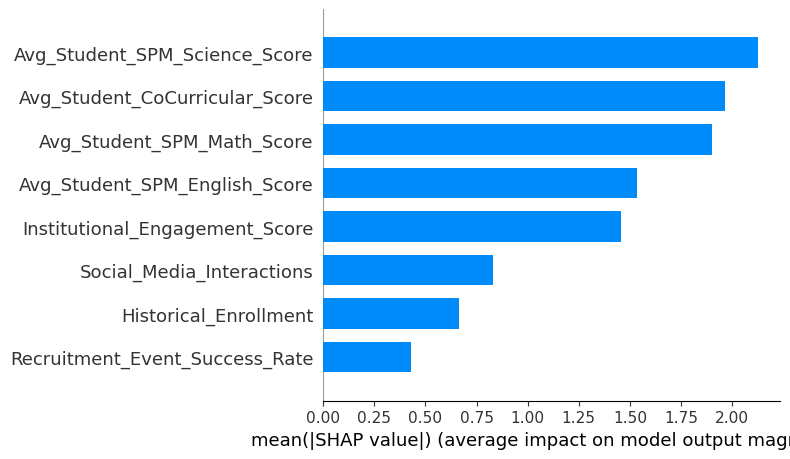

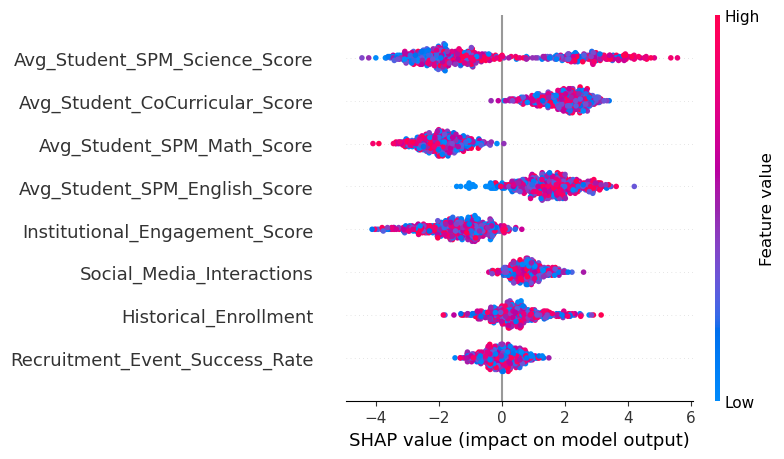

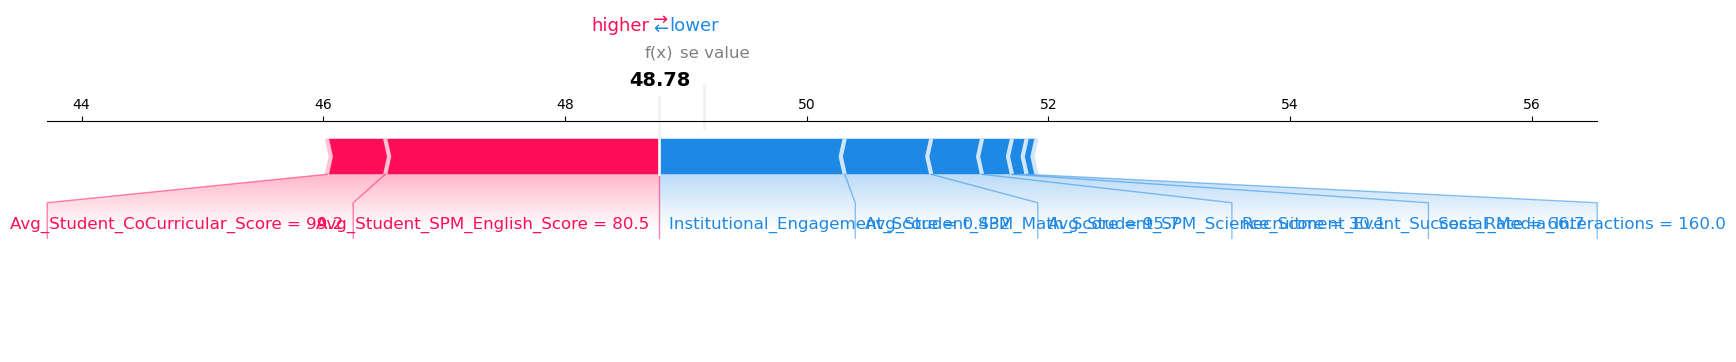

In [8]:

import shap
import matplotlib.pyplot as plt

# Step 3: Load the feature set (Top 10 normalized features before applying weights)
features_for_shap = features  # the real feature values before normalization and weighting

# Step 5: Initialize SHAP explainer
explainer = shap.TreeExplainer(rf) # rf = random forest model

# Step 6: Calculate SHAP values
shap_values = explainer.shap_values(features_for_shap, check_additivity=False)

# Step 7: SHAP Summary Plot (Feature Importance Across All Schools)
shap.summary_plot(shap_values, features_for_shap, plot_type="bar")
plt.show()

# Step 8: SHAP Detailed Summary Plot (How each feature affects predictions)
shap.summary_plot(shap_values, features_for_shap)
plt.show()

# Step 9: Optional - Explain a Specific School
# Pick the top school (row 0 after ranking)
shap.force_plot(explainer.expected_value, shap_values[0,:], features_for_shap.iloc[0,:], matplotlib=True)


Interpretation
1. Bar Plot
- longer bar = more important for prediction
- longer bar is the most important whether a student is likely to enroll (which affects school ranking)

2. SHAP Beeswarm Summary Plot
- each dot is one school ; Position on x-axis = SHAP value (impact on Priority Score)
- Red color = High feature value ; Blue color = Low feature value
- Right side (positive SHAP value) ; Pushes Priority Score higher
- Left side (negative SHAP value) ; Pushes Priority Score lower

3. SHAP Force Plot
- center value = model's avg output = 48.58
- size of arrow = how strong that feature's effect is

# Mapping the Marketing Strategy

In [9]:
# Define the strategy suggestion function
def suggest_marketing_strategy(row):
    if row['Avg_Student_SPM_English_Score'] >= 80 and row['Avg_Student_SPM_Science_Score'] >= 80 and row['Institutional_Engagement_Score'] > 0.5:
        return 'Scholarship Invitation + On-site Visit'
    elif row['Social_Media_Interactions'] > 300:
        return 'Social Media Campaigns (Instagram, TikTok, YouTube)'
    # No 'Real_Time_Student_Response_Rate' now, so we skip this condition
    elif row['Institutional_Engagement_Score'] < 0.3:
        return 'Recruitment Event at School'
    elif row['Sentiment_Score'] > 0.2:
        return 'Personalized Email Thank You Campaign'
    elif row['Recruitment_Event_Success_Rate'] > 60:
        return 'Re-invite for Campus Visit / Open Day'
    elif row['Historical_Enrollment'] > 1500:
        return 'High-Volume Event Sponsorship'
    else:
        return 'General Digital Marketing (Website, Facebook Ads)'

# Apply the function to your ranked schools
features_normalized['Recommended_Strategy'] = features_normalized.apply(suggest_marketing_strategy, axis=1)

# Display final result
print("\nTop 10 Schools with Recommended Marketing Strategies:")
print(features_normalized[['School_ID', 'School_Name', 'School_Location', 'School_Visit_Priority_Score', 'Recommended_Strategy']].head(10))



Top 10 Schools with Recommended Marketing Strategies:
    School_ID         School_Name School_Location  \
18    SCH1018     SMK Sri Bestari           Sabah   
347   SCH1347  SMK Melawati Bukit      Terengganu   
78    SCH1078  SMK Bandar Bestari    Kuala Lumpur   
321   SCH1321    SMK Seri Harmoni        Selangor   
2     SCH1002  SMK Melawati Taman        Selangor   
340   SCH1340        SMK Maju Sri           Sabah   
123   SCH1123    SMK Seri Harmoni          Penang   
89    SCH1089     SMK Indah Damai           Sabah   
151   SCH1151  SMK Melawati Putra           Perak   
308   SCH1308      SMK Damai Seri          Melaka   

     School_Visit_Priority_Score         Recommended_Strategy  
18                      0.605355  Recruitment Event at School  
347                     0.595464  Recruitment Event at School  
78                      0.593751  Recruitment Event at School  
321                     0.580749  Recruitment Event at School  
2                       0.578967  Recruit